In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import pandas as pd

In [13]:
def load_data(fname):
    f = open(fname, "rb")
    data = pickle.load(f)
    f.close()
    return data

# Train Model

In [14]:
# Variables to train model
datavars = ["educ","exper","expersq","KWW","black","smsa","married","enroll","south",'reg661','reg662','reg663','reg664','reg665','reg666','reg667','reg668']

data = load_data('../Data/wage_processed_data.dat')

# Just use some variable in data
X_data = data[datavars]
# Add ones to first column of matrix
X = np.concatenate((np.ones(shape=(data.shape[0],1)) , np.array(X_data)), axis=1)
# Log wage is the output
Y = np.array(data["lwage"]).reshape(len(data["lwage"]), 1)
# Split data to train and test, shuffle the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, shuffle=False)

print("X train shape: {0} \nY train shape: {1}".format(X_train.shape, Y_train.shape))

print("X test shape: {0} \nY test shape: {1}".format(X_test.shape, Y_test.shape))

X train shape: (2654, 18) 
Y train shape: (2654, 1)
X test shape: (295, 18) 
Y test shape: (295, 1)


In [15]:
# Calculate inverse of X_T @ X 
X_TX_inverse = np.linalg.inv(X_train.transpose() @ X_train)
# Calculate beta
beta = X_TX_inverse @ X_train.transpose() @ Y_train

# Use library to calculate beta
reg = LinearRegression()
reg.fit(X_train, Y_train)
beta_ = reg.coef_.transpose()
beta_[0,0] += reg.intercept_
print("my beta: \n{0}".format(beta.T))
print("sklearn beta: \n{0}".format(beta_.T))

my beta: 
[[ 4.86022202e+00  5.32828499e-02  5.62511775e-02 -1.52146205e-03
   7.98181866e-03 -1.24599347e-01  1.37477151e-01  1.40325151e-01
  -1.30659267e-01 -1.36356426e-01 -1.36604992e-01 -3.74880165e-02
   1.25380056e-02 -8.66905816e-02 -4.31047850e-04  4.51402266e-03
  -1.60259327e-03 -1.84796472e-01]]
sklearn beta: 
[[ 4.86022202e+00  5.32828499e-02  5.62511775e-02 -1.52146205e-03
   7.98181866e-03 -1.24599347e-01  1.37477151e-01  1.40325151e-01
  -1.30659267e-01 -1.36356426e-01 -1.36604992e-01 -3.74880165e-02
   1.25380056e-02 -8.66905816e-02 -4.31047850e-04  4.51402266e-03
  -1.60259327e-03 -1.84796472e-01]]


In [16]:
# Save our beta to file
np.save("../Data/Output/beta.npy", beta)

# Evaluate Model

In [17]:
# Calculate train error (MSE)
train_error = np.linalg.norm(Y_train - X_train @ beta)**2 / Y_train.shape[0]
# Calculate test error (MSE)
test_error = np.linalg.norm(Y_test - X_test @ beta)**2 / Y_test.shape[0]
# Calculate the score to evaluate the effeciency (R-square)
train_score = 1 - np.linalg.norm(Y_train - X_train @ beta) ** 2 / np.linalg.norm(Y_train - Y_train.mean()) ** 2
test_score = 1 - np.linalg.norm(Y_test - X_test @ beta) ** 2 / np.linalg.norm(Y_test - Y_test.mean()) ** 2
print("Train error: {0}".format(train_error))
print("Test error: {0}".format(test_error))
print("Train R-square: {0}".format(train_score))
print("Test R-square: {0}".format(test_score))

Train error: 0.12520220965397558
Test error: 0.11695983903492911
Train R-square: 0.30355029217701957
Test R-square: 0.3020533950391344


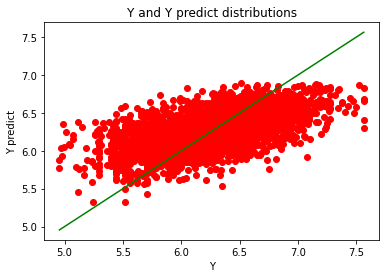

In [19]:
plt.plot(Y, X @ beta, 'ro')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'g-')
plt.xlabel('Y')
plt.ylabel('Y predict')
plt.title("Y and Y predict distributions")
plt.savefig("../Data/Output/output_distribution/y_and_y_pred.png")
plt.show()

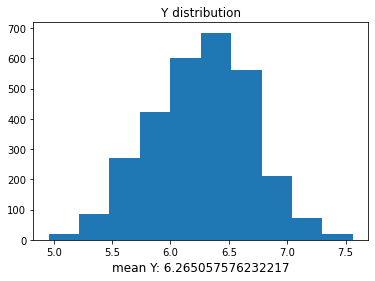

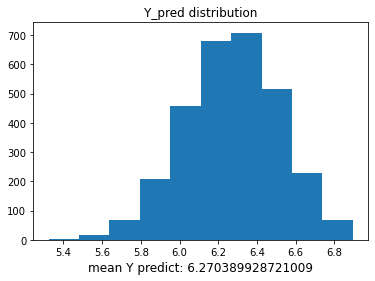

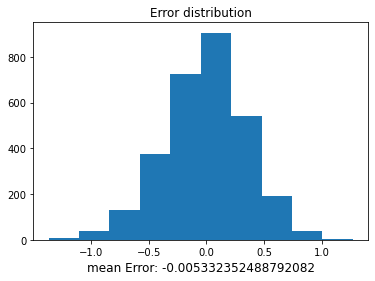

In [22]:
# Display distributions (Create distributions folder before run this code)
plt.hist(Y)
plt.title("Y distribution")
plt.xlabel("mean Y: {0}".format(Y.mean()), fontsize=12)
plt.savefig("../Data/Output/output_distribution/y_dis.png")
plt.show()
plt.hist(X @ beta)
plt.title("Y_pred distribution")
plt.xlabel("mean Y predict: {0}".format((X @ beta).mean()), fontsize=12)
plt.savefig("../Data/Output/output_distribution/y_pred_dis.png")
plt.show()
plt.hist(Y - X @ beta)
plt.title("Error distribution")
plt.xlabel("mean Error: {0}".format((Y - X @ beta).mean()), fontsize=12)
plt.savefig("../Data/Output/output_distribution/error_dis.png")
plt.show()

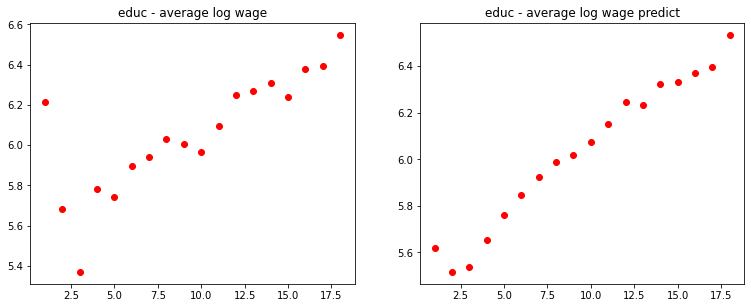

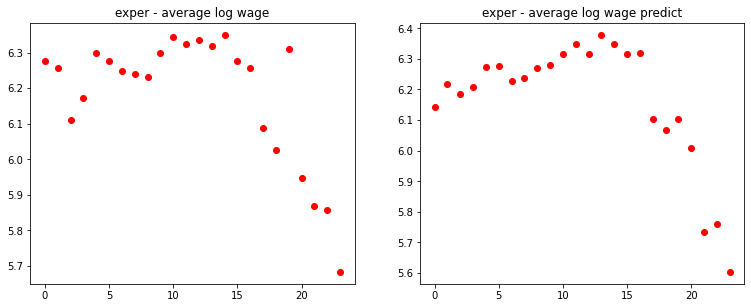

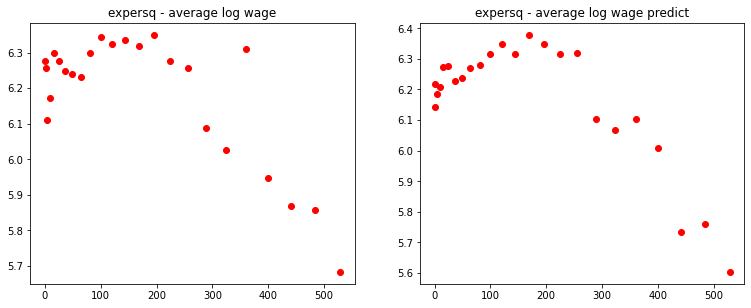

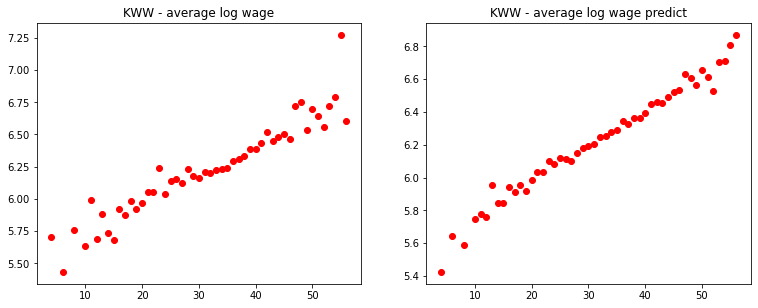

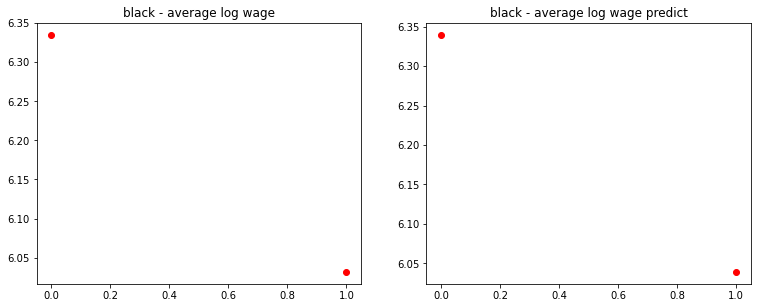

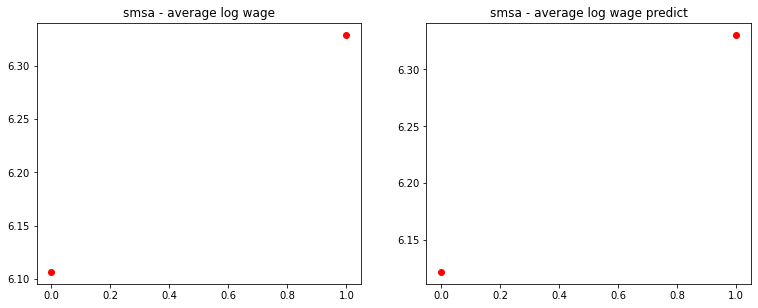

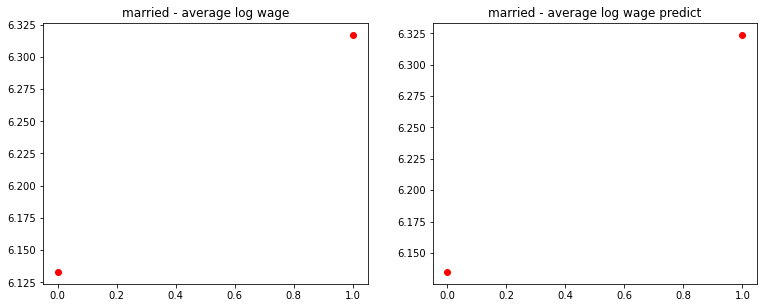

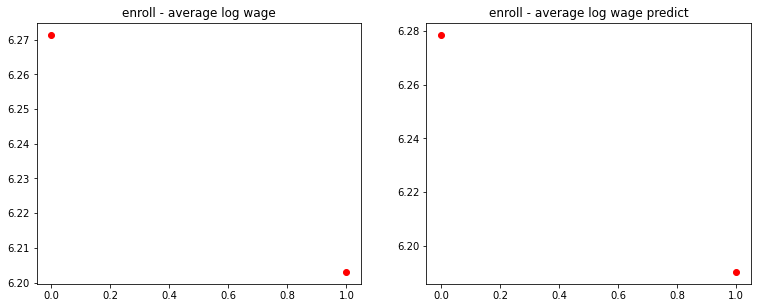

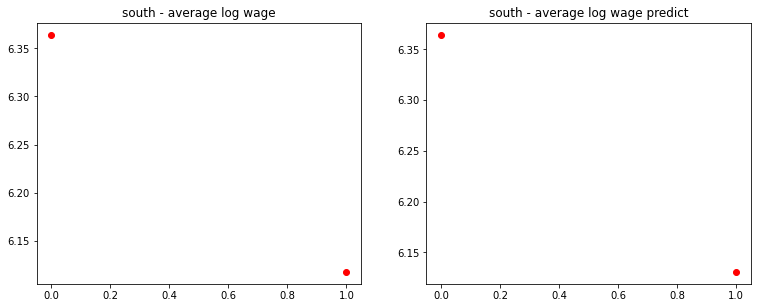

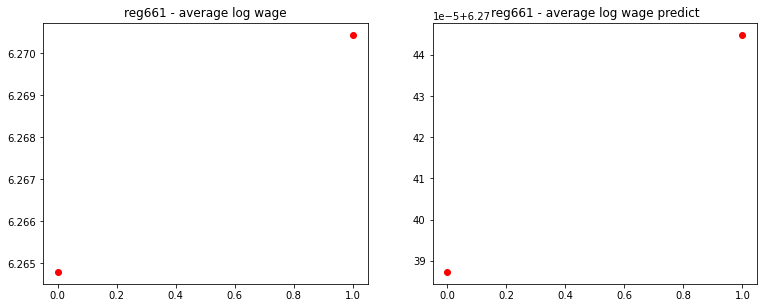

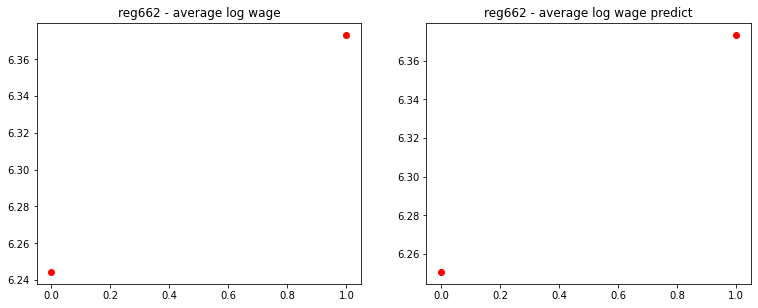

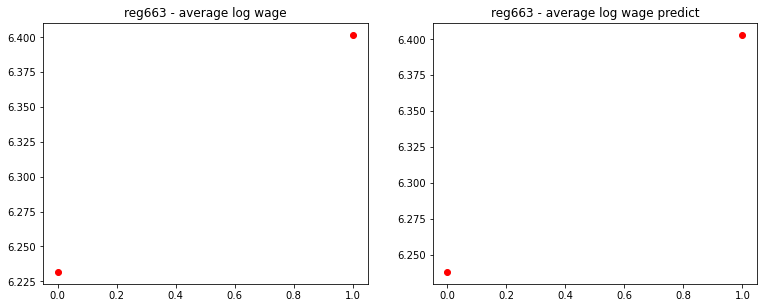

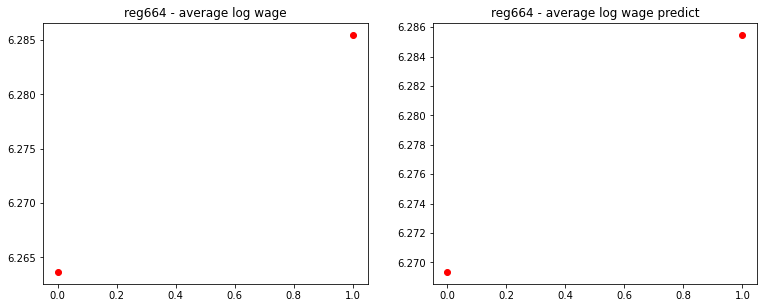

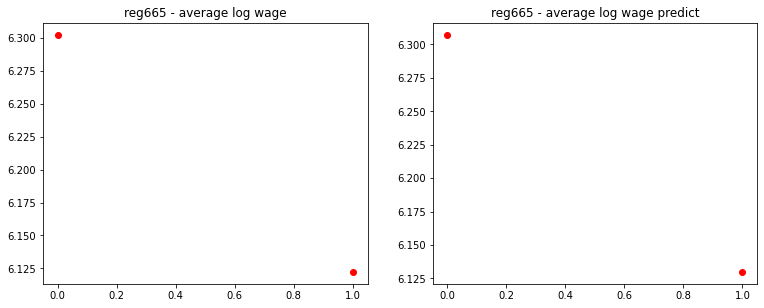

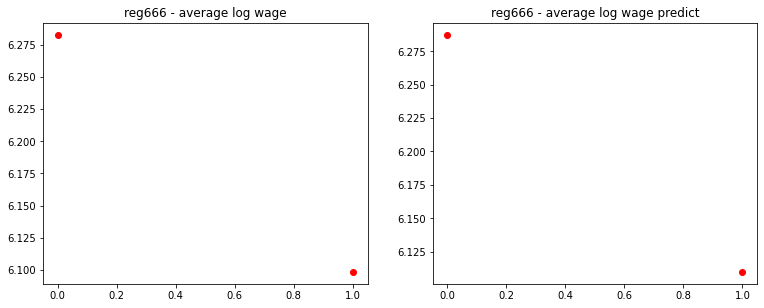

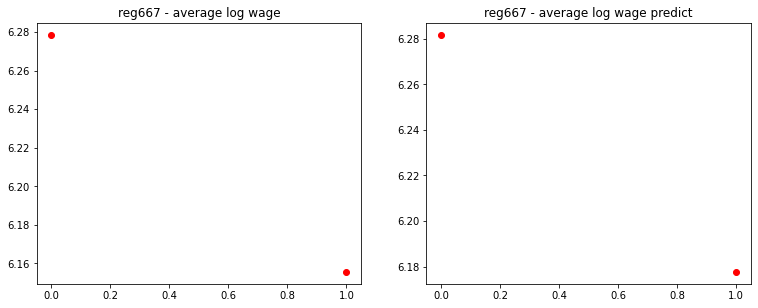

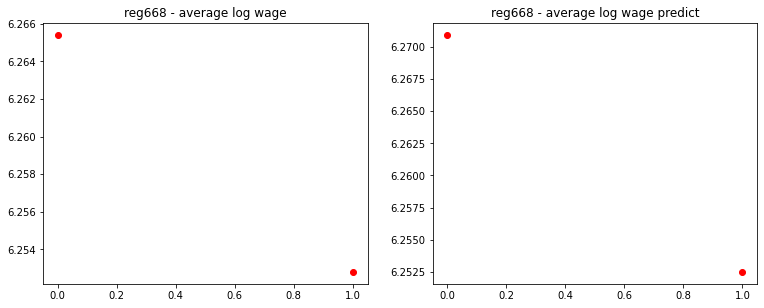

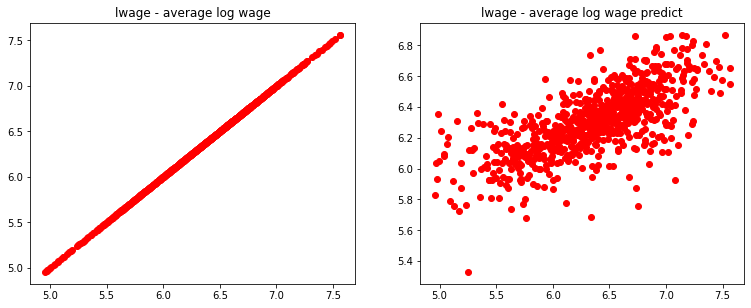

In [21]:
# Display mean of data points
for x in data.columns:
    fig, axis = plt.subplots(1, 2, figsize=[12.8,4.8])
    plt.cla()
    axis[0].set_title(x+" - average log wage")
    axis[1].set_title(x+" - average log wage predict")
    for dtx in set(data[x]):
        y = data[data[x] == dtx]["lwage"].mean()
        axis[0].plot(dtx, y, "ro")
        y = (data[data[x] == dtx][datavars] @ beta[1:] + beta[0]).mean()
        axis[1].plot(dtx, y, "ro")
    plt.show()